**NODAL POINT ANALYSIS:**


---



**Analysis With the Bottom Hole Node**

- Nodal analysis is performed on the principle
of pressure continuity.
- When the bottom-hole is used as a solution node in Nodal
analysis, the inflow performance is the well inflow performance relationship (IPR) and the outflow performance
is the tubing performance relationship (TPR)

**Well Data:**

In [1]:
# Given Data of Oil well
Pres = 3500 # psia (above Bubble Point)
D = 1.66 # (tubing ID) 
Pwellhead = 500 # psia
J = 1 # (above bubble Point)
GLR = 1000 # scf/stb
WC = 0.25 # (watercut)
oil_API = 30 # degree
Yw = 1.05
Yg = 0.65
Bo = 1.2 # rb/stb
Twellhead = 100 # degree F
Tubing_shoe_depth = 5000 # ft
Tbottomhole = 150 # degree F

**Importing Required Libraries**

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**IPR MODEL USED:**

The most simplest model as the reservoir pressure is above Pb

Qo = J*(Pres - Pwf)

**TPR MODEL USED:**
Poettmann–Carpenter’s model which considers multiphase flow in the tubing. It uses friction factor but doesnot take liquid viscosity into account.

Pwf = Pwh + (Rho_mix + k/Rho_mix)H/144

where k = (f Qo^2 M^2) / (7.4137 10^10 D^5))


**Calculating Parameters that will not change during Iteration**

In [3]:
# Oil specific Gravity
Yo = 141.5/(131.5+oil_API)

# Mass associated with 1 stb of oil 
GOR = GLR /(1-WC)
WOR = WC/(1-WC)
M = (350.17 * (Yo + 0.33 * Yw) )+ (GOR*Yg*0.0765)

# WELL HEAD parameters 
Rs_head = Yg*pow(( (Pwellhead/18)* (pow(10, 0.0125*oil_API)/pow(10, 0.00091*Twellhead))), 1.2048)
Bo_head = 0.9759 + 0.00012*pow((Rs_head*pow(Yg/Yo, 0.5) + 1.25*Twellhead), 1.2)
Vm_head = 5.615*(Bo_head + WC * Bo) +(GOR - Rs_head)*(14.7/Pwellhead)*((Twellhead+460)/520)*(0.9318)

Rho_head = M/Vm_head 

**ITERATION**

In [9]:
Ql = 500 # Assumed Initial Value 
Aof = J*Pres # Max value of Q

# Conatainers for ipr, tpr pressures and flow rates
ipr = []
tpr = []
Q = []

while Ql<Aof:
 
    Qo = Ql-Ql*WC

    # PWf from IPR model
    Pwf_ipr = Pres - Qo/J 
    ipr.append(Pwf_ipr)

    # BOTTOM HOLE PARAMETERS
    Rs_bottom = Yg*pow(( (Pwf_ipr/18)* (pow(10, 0.0125*oil_API)/pow(10, 0.00091*Tbottomhole))), 1.2048)
    Bo_bottom = 0.9759 + 0.00012*pow((Rs_bottom*pow(Yg/Yo, 0.5) + 1.25*Tbottomhole), 1.2)
    Vm_bottom = 5.615*(Bo_bottom + WC * Bo) +(GOR - Rs_bottom)*(14.7/Pwf_ipr)*((Tbottomhole+460)/520)*(0.9318)
    Rho_bottom = M/Vm_bottom
    
    Rho_mixture = (Rho_head + Rho_bottom)/2
    
    # Inertial Force
    rdv = 1.4737*pow(10,-5)*M*(Qo)*12/D
    
    # Friction Factor
    f = 4*(pow(10, 1.444 - 2.5*np.log10(rdv)))
    
    # Friction term
    K = f*Qo*Qo*M*M/(7.4137*pow(10,10)*pow(D/12,5))
    
    # Pwf from TPR model
    Pwf_tpr = Pwellhead + (Rho_mixture  + K/Rho_mixture )*(Tubing_shoe_depth/144)
    tpr.append(Pwf_tpr)
    
    # For Q when Error is very less than that is our operational Point 
    error = abs(Pwf_ipr - Pwf_tpr)
    if(error<4):print("Operational Bottom Hole Pressure: ",(Pwf_ipr)); print("Operational Flow Rate: ",(Qo))
    
    Q.append(Qo)
    Ql = Ql + 10   

Operational Bottom Hole Pressure:  1640.0
Operational Flow Rate:  1860.0


**TPR and IPR Plot**

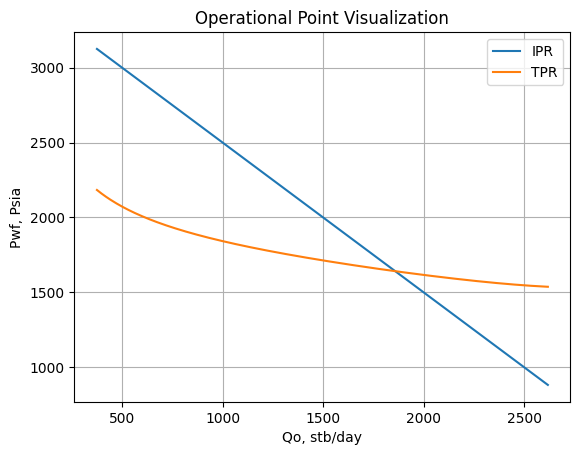

In [13]:
# Plotting Curves
plt.style.use('default')    
plt.plot(Q, ipr, label='IPR')
plt.plot(Q, tpr, label='TPR')    
plt.title('Operational Point Visualization')

plt.xlabel('Qo, stb/day')
plt.ylabel("Pwf, Psia")
plt.legend()
plt.grid()